In [3]:
from ffnn_scratch import FFNN
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

# PERSIAPAN DATA

In [4]:
# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocessing
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0  # Normalisasi
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train, num_classes=10)  # One-hot encoding
y_test = to_categorical(y_test, num_classes=10)

In [5]:
y_train=y_train.astype('float64')
y_test=y_test.astype('float64')

# Variasi Depth dan Width

In [6]:
layer_sizes_list_width = [
    [784, 16, 16, 10],
    [784, 32, 32, 10],
    [784, 64, 64, 10],
]
layer_sizes_list_depth = [
    [784, 32, 10],
    [784, 32, 32, 10],
    [784, 32, 32, 32, 10],
]

def run_experiment(layer_sizes_list, X_train, y_train, X_test, y_test, title=""):
    results = []

    for i, layer_sizes in enumerate(layer_sizes_list):
        activations = ['relu'] * (len(layer_sizes) - 2) + ['softmax']
        model = FFNN(layer_sizes, activations,
                     weight_init='random_normal',
                     init_params={'lower': -1.0, 'upper': 1.0},
                     seed=42)

        print(f"\nTraining Model {i+1} | Arsitektur: {layer_sizes}")
        history = model.train(X_train, y_train,
                              batch_size=32,
                              epochs=20,
                              learning_rate=0.01,
                              loss_func="categorical_cross_entropy",
                              X_val=X_test,
                              y_val=y_test,
                              verbose=0,
                              regularization="l2",
                              lambda_reg=0.01)

        # Akurasi akhir
        y_pred = model.infer(X_test)
        y_true_cls = np.argmax(y_test, axis=1)
        y_pred_cls = np.argmax(y_pred, axis=1)
        acc = accuracy_score(y_true_cls, y_pred_cls)

        print(f" Accuracy: {acc:.4f}")
        results.append((layer_sizes, history, acc))

        # Plot loss
        plt.plot(history['train_loss'], label=f"Train {layer_sizes}")
        plt.plot(history['val_loss'], linestyle='--', label=f"Val {layer_sizes}")

    plt.title(f"Loss Curve - {title}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

    return results



Training Model 1 | Arsitektur: [784, 16, 16, 10]


Epoch 20/20: 100%|██████████| 60000/60000 [00:01<00:00, 56659.23inst/s]


 Accuracy: 0.4597

Training Model 2 | Arsitektur: [784, 32, 32, 10]


Epoch 20/20: 100%|██████████| 60000/60000 [00:00<00:00, 64638.63inst/s]


 Accuracy: 0.8417

Training Model 3 | Arsitektur: [784, 64, 64, 10]


Epoch 20/20: 100%|██████████| 60000/60000 [00:01<00:00, 51791.90inst/s]


 Accuracy: 0.8526


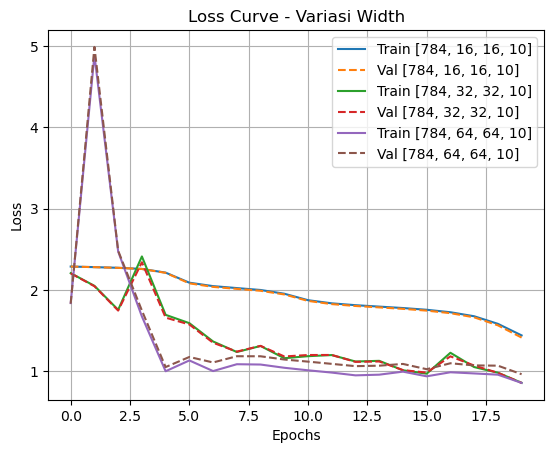


Training Model 1 | Arsitektur: [784, 32, 10]


Epoch 20/20: 100%|██████████| 60000/60000 [00:00<00:00, 76190.53inst/s]


 Accuracy: 0.7680

Training Model 2 | Arsitektur: [784, 32, 32, 10]


Epoch 20/20: 100%|██████████| 60000/60000 [00:00<00:00, 69003.97inst/s]


 Accuracy: 0.8417

Training Model 3 | Arsitektur: [784, 32, 32, 32, 10]


Epoch 20/20: 100%|██████████| 60000/60000 [00:01<00:00, 56359.76inst/s]


 Accuracy: 0.1135


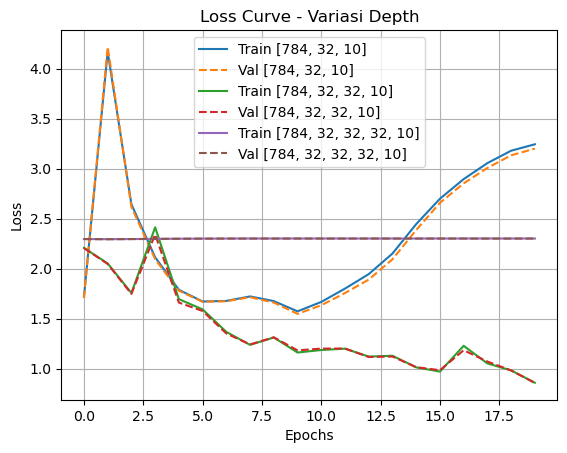

In [7]:
# Variasi width (depth tetap)
results_width = run_experiment(layer_sizes_list_width, X_train, y_train, X_test, y_test, title="Variasi Width")

# Variasi depth (width tetap)
results_depth = run_experiment(layer_sizes_list_depth, X_train, y_train, X_test, y_test, title="Variasi Depth")

# Variasi Fungsi Aktivasi

In [2]:
def plot_distribution(arr, title):
    plt.hist(arr.flatten(), bins=50, alpha=0.7)
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

def experiment_activation_functions(X_train, y_train, X_test, y_test):
    activations_to_test = ['sigmoid', 'tanh', 'relu','linear']
    results = []

    for act in activations_to_test:
        print(f"\n Aktivasi: {act}")
        activations = [act, act, 'softmax']
        model = FFNN([784, 32, 10], activations,
                     weight_init='random_normal',
                     init_params={'lower': -1.0, 'upper': 1.0},
                     seed=42)

        history = model.train(X_train, y_train,
                              batch_size=32,
                              epochs=20,
                              learning_rate=0.001,
                              loss_func="categorical_cross_entropy",
                              X_val=X_test,
                              y_val=y_test,
                              verbose=0,
                              regularization="l2",
                              lambda_reg=0.01)

        y_pred = model.infer(X_test)
        y_true_cls = np.argmax(y_test, axis=1)
        y_pred_cls = np.argmax(y_pred, axis=1)
        acc = accuracy_score(y_true_cls, y_pred_cls)

        print(f" Accuracy: {acc:.4f}")

        results.append((act, history, acc, model.weights, model.gradients))

        # Plot loss
        plt.plot(history['train_loss'], label=f"Train ({act})")
        plt.plot(history['val_loss'], linestyle='--', label=f"Val ({act})")

    plt.title("Training & Validation Loss per Activation")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Distribusi bobot & gradien
    for act, _, _, weights, grads in results:
        for i, (w, g) in enumerate(zip(weights, grads)):
            plot_distribution(w, f"Weight Distribution - Layer {i+1} ({act})")
            plot_distribution(g, f"Gradient Distribution - Layer {i+1} ({act})")

    return results


 Aktivasi: sigmoid


Epoch 20/20: 100%|██████████| 60000/60000 [00:00<00:00, 80576.66inst/s]


 Accuracy: 0.2450

 Aktivasi: tanh


Epoch 1/20: 100%|██████████| 60000/60000 [00:00<00:00, 83062.41inst/s]
c:\Users\konst\OneDrive\Documents\Arsip Minor IF\TUBES-1-ML\src\ffnn_scratch.py:57: RuntimeWarning: invalid value encountered in log
  return -np.mean(np.sum(y_true * np.log(y_pred + 1e-12), axis=1)) if not derivative else (y_pred - y_true)
Epoch 20/20: 100%|██████████| 60000/60000 [00:00<00:00, 79519.05inst/s]


 Accuracy: 0.8482

 Aktivasi: relu


Epoch 20/20: 100%|██████████| 60000/60000 [00:00<00:00, 86201.60inst/s]


 Accuracy: 0.8060

 Aktivasi: linear


Epoch 1/20: 100%|██████████| 60000/60000 [00:00<00:00, 86578.44inst/s]
c:\Users\konst\OneDrive\Documents\Arsip Minor IF\TUBES-1-ML\src\ffnn_scratch.py:57: RuntimeWarning: invalid value encountered in log
  return -np.mean(np.sum(y_true * np.log(y_pred + 1e-12), axis=1)) if not derivative else (y_pred - y_true)
Epoch 20/20: 100%|██████████| 60000/60000 [00:00<00:00, 91095.89inst/s]


 Accuracy: 0.8412


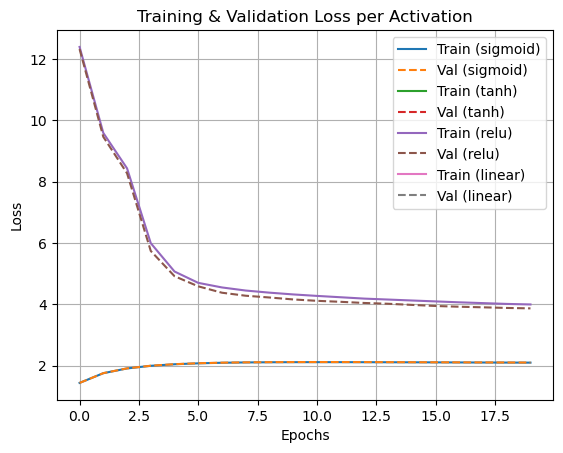

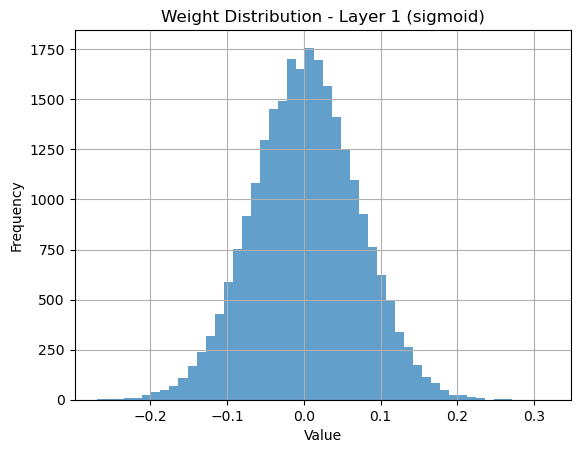

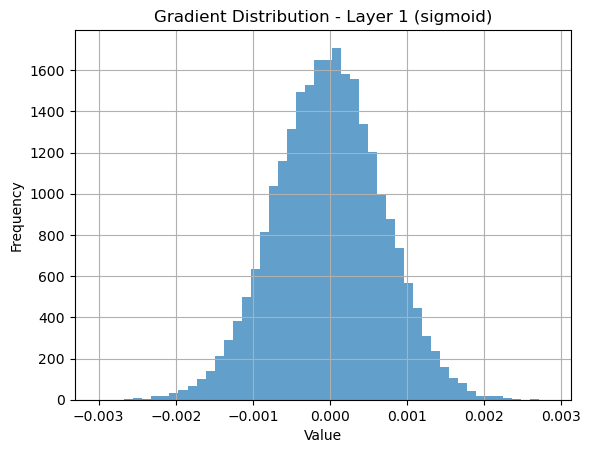

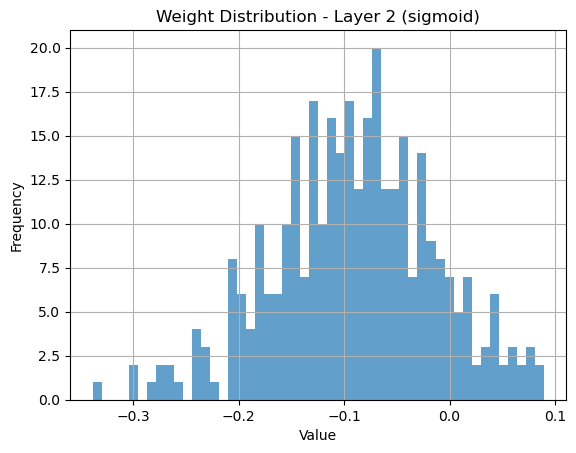

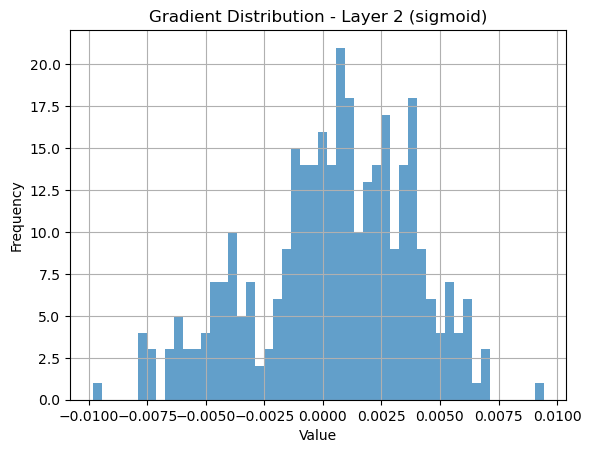

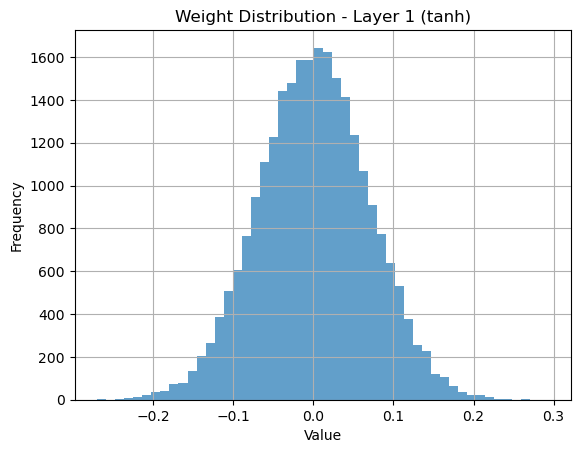

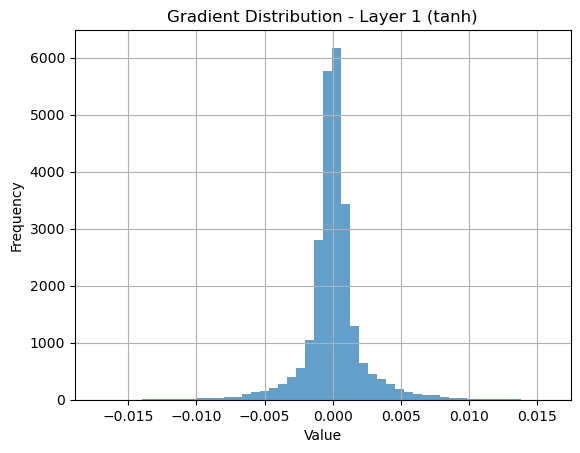

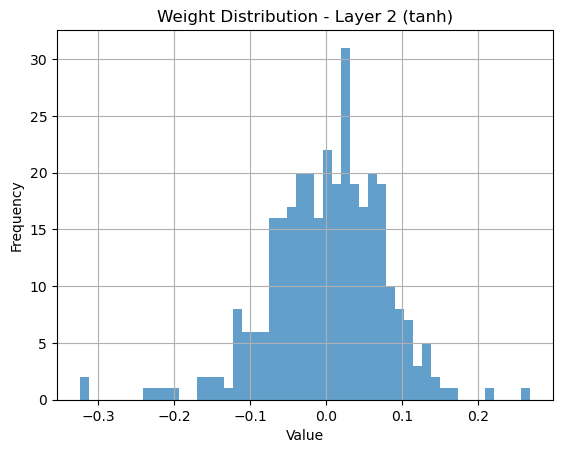

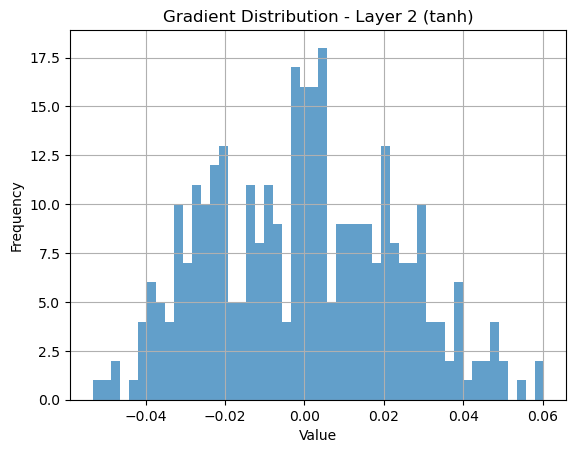

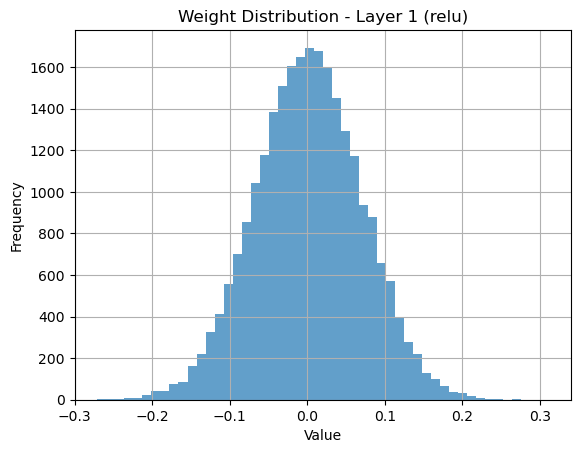

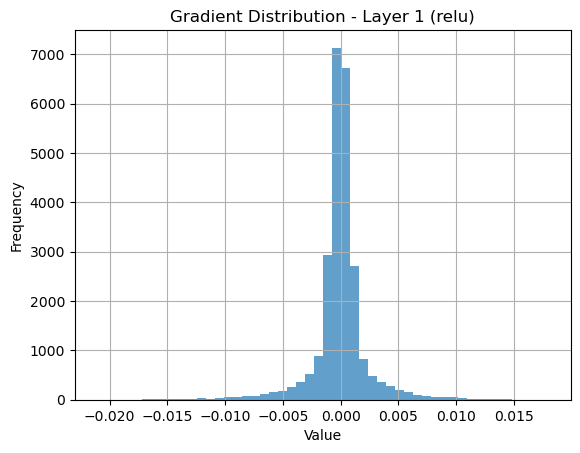

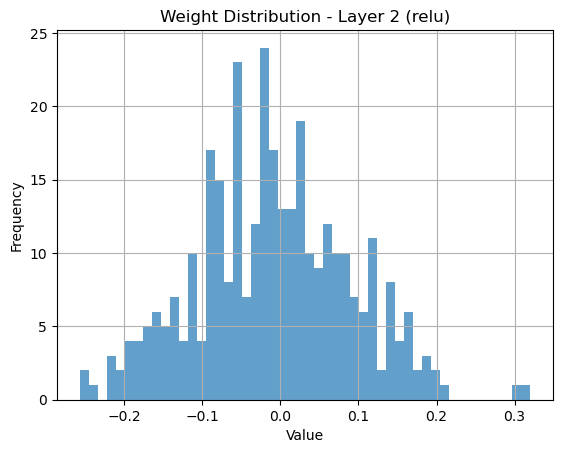

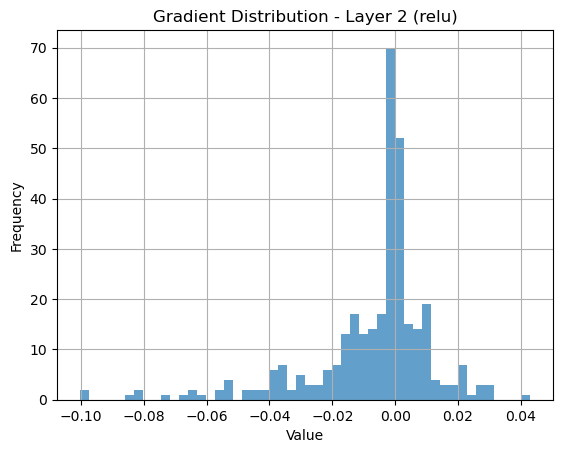

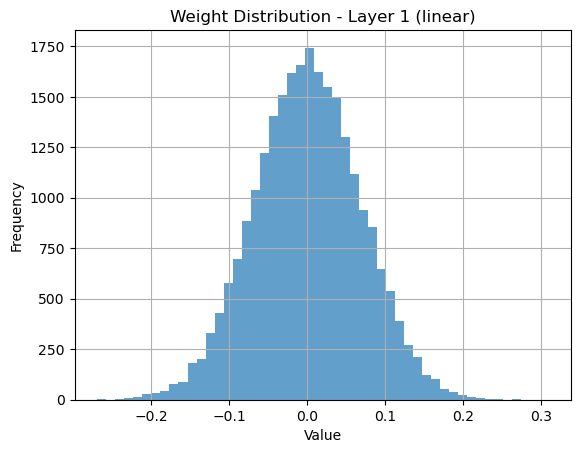

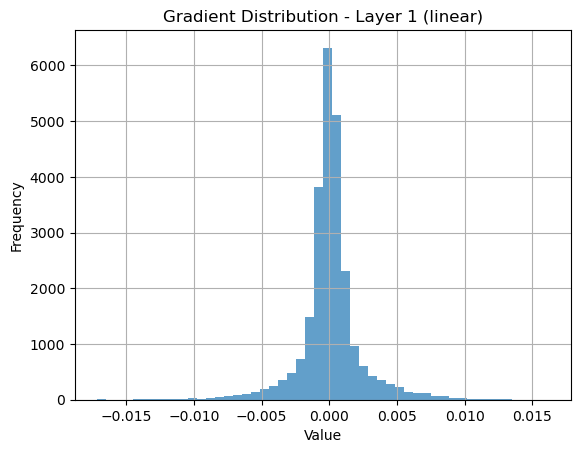

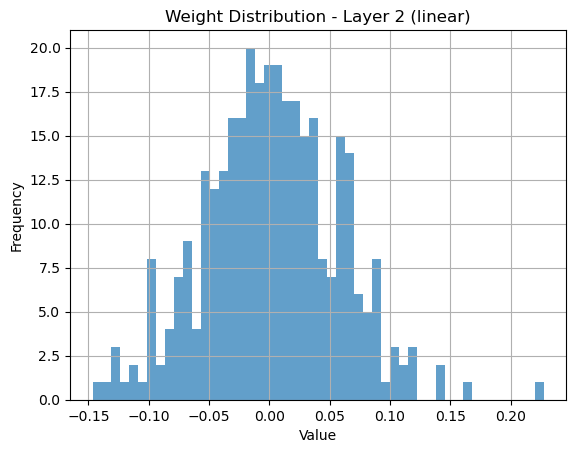

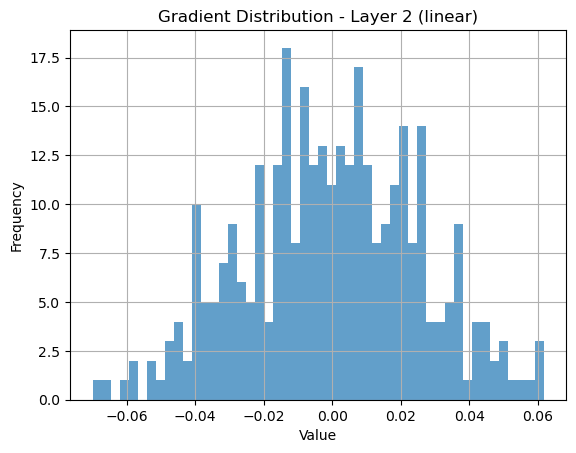

In [7]:
results_activations = experiment_activation_functions(X_train, y_train, X_test, y_test)

# Variasi Learning Rate

In [8]:
def plot_distribution(arr, title):
    plt.hist(arr.flatten(), bins=50, alpha=0.7)
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

def experiment_learning_rates(X_train, y_train, X_test, y_test, learning_rates=[0.1, 0.01, 0.001]):
    results = []

    for lr in learning_rates:
        print(f"\n Learning Rate: {lr}")
        activations = ['relu', 'relu', 'softmax']
        model = FFNN([784, 32, 32, 10], activations,
                     weight_init='random_normal',
                     init_params={'lower': -1.0, 'upper': 1.0},
                     seed=42)

        history = model.train(X_train, y_train,
                              batch_size=32,
                              epochs=20,
                              learning_rate=lr,
                              loss_func="categorical_cross_entropy",
                              X_val=X_test,
                              y_val=y_test,
                              verbose=0,
                              regularization="l2",
                              lambda_reg=0.01)

        y_pred = model.forward_propagation(X_test)
        y_true_cls = np.argmax(y_test, axis=1)
        y_pred_cls = np.argmax(y_pred, axis=1)
        acc = accuracy_score(y_true_cls, y_pred_cls)

        print(f" Accuracy: {acc:.4f}")

        results.append((lr, history, acc, model.weights, model.gradients))

        # Plot loss per LR
        plt.plot(history['train_loss'], label=f"Train (lr={lr})")
        plt.plot(history['val_loss'], linestyle='--', label=f"Val (lr={lr})")

    plt.title("Training & Validation Loss per Learning Rate")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Distribusi bobot & gradien
    for lr, _, _, weights, grads in results:
        for i, (w, g) in enumerate(zip(weights, grads)):
            plot_distribution(w, f"Weight Distribution - Layer {i+1} (lr={lr})")
            plot_distribution(g, f"Gradient Distribution - Layer {i+1} (lr={lr})")

    return results



 Learning Rate: 0.1


Epoch 20/20: 100%|██████████| 60000/60000 [00:00<00:00, 66920.65inst/s]


 Accuracy: 0.8260

 Learning Rate: 0.01


Epoch 20/20: 100%|██████████| 60000/60000 [00:01<00:00, 47957.69inst/s]


 Accuracy: 0.8417

 Learning Rate: 0.001


Epoch 20/20: 100%|██████████| 60000/60000 [00:00<00:00, 68152.04inst/s]


 Accuracy: 0.2400


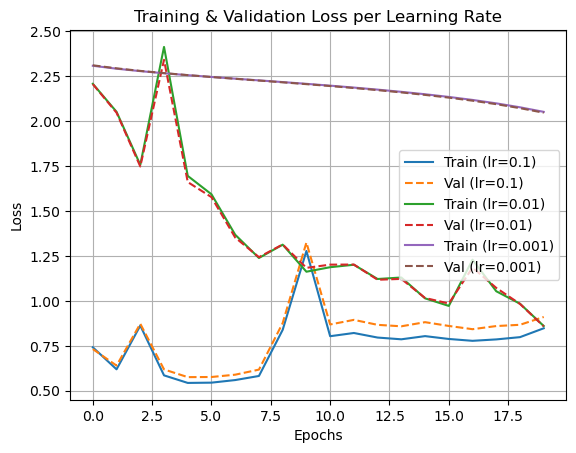

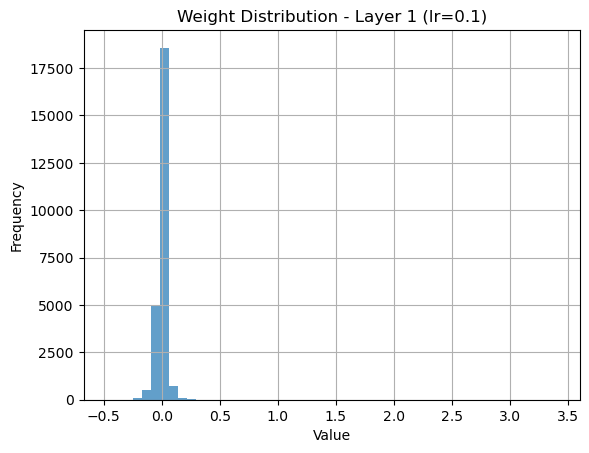

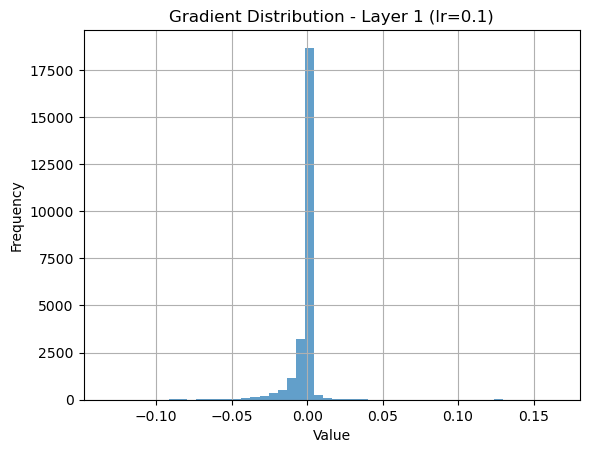

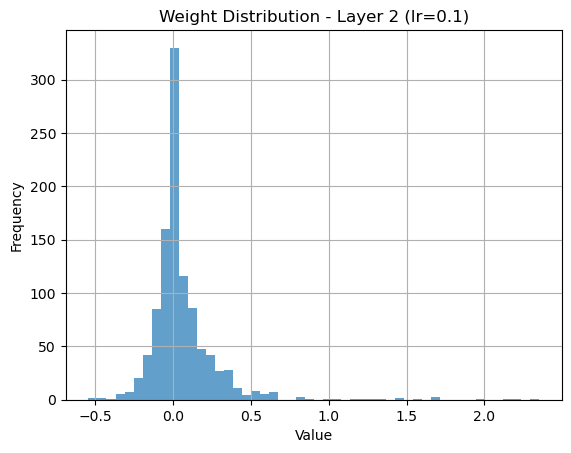

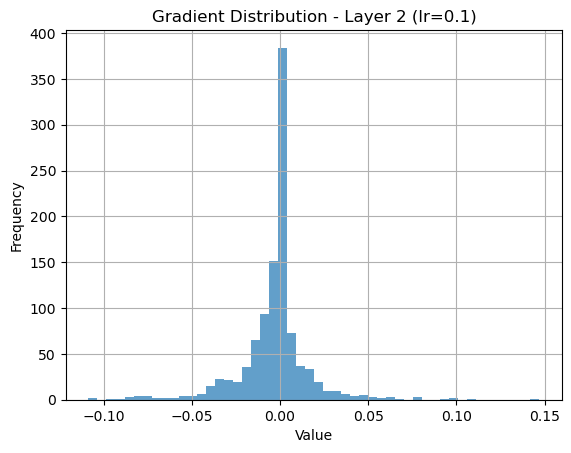

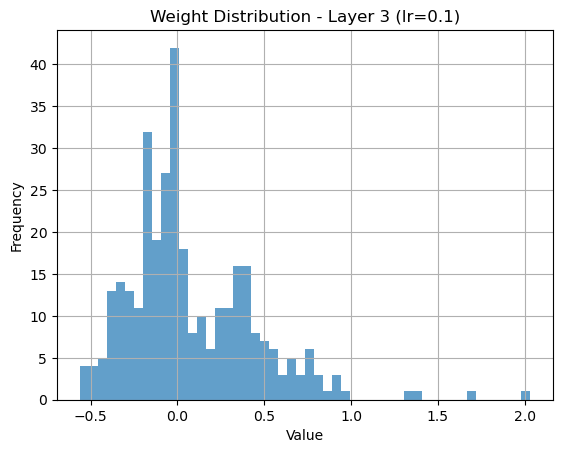

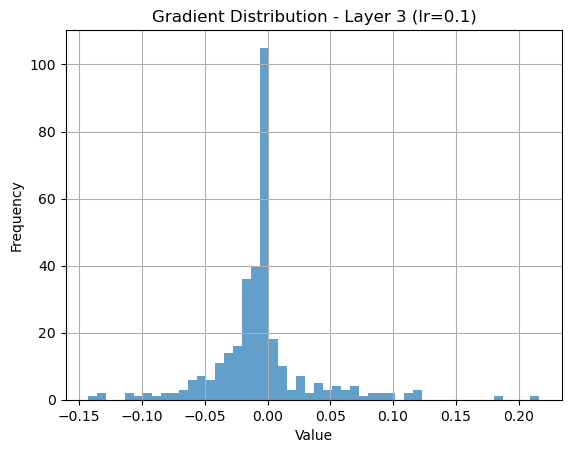

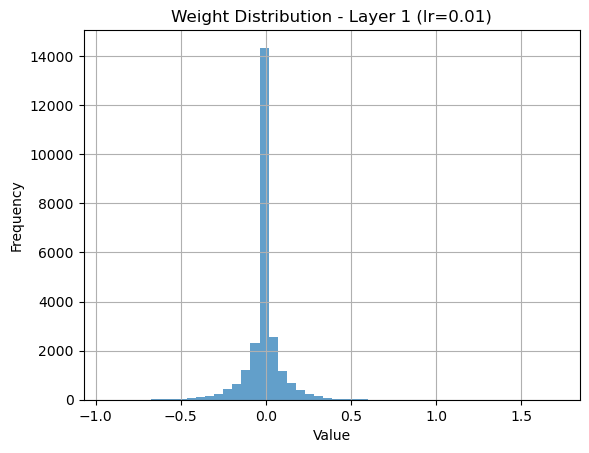

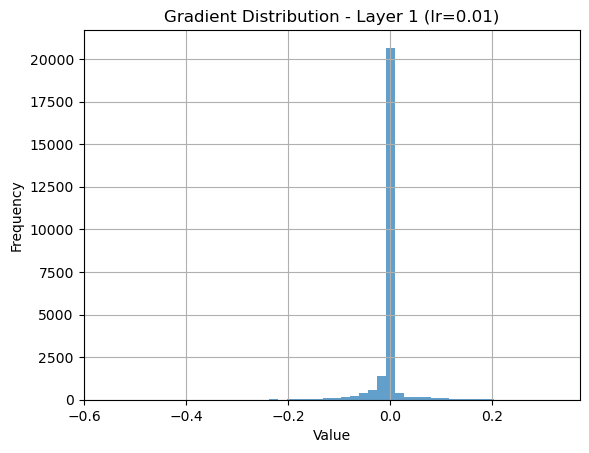

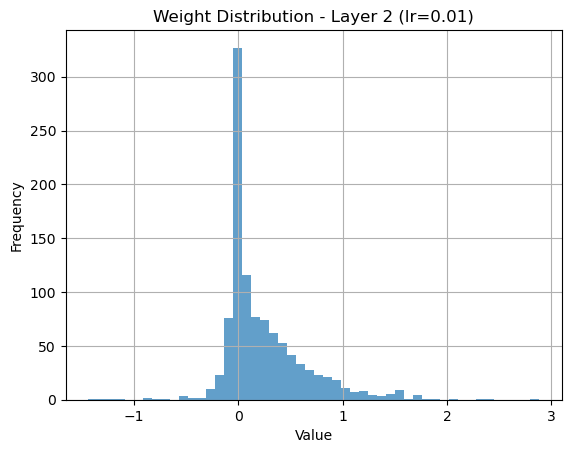

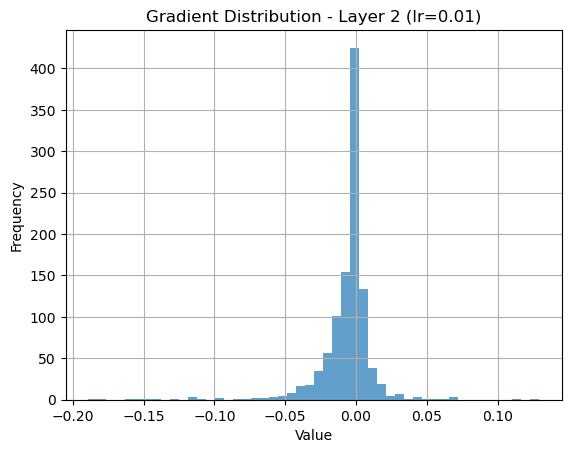

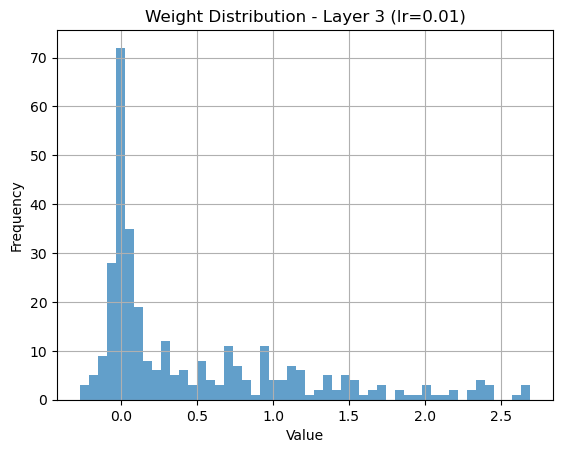

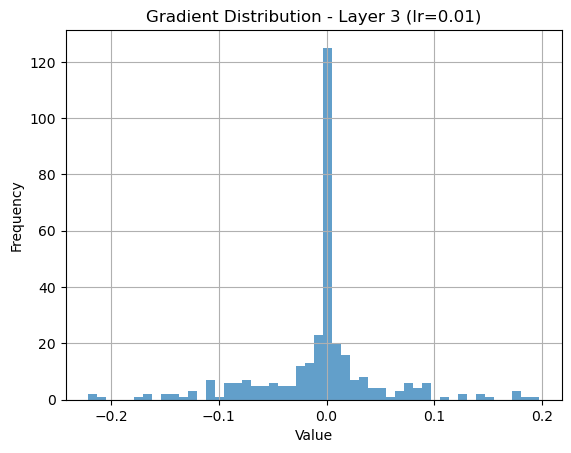

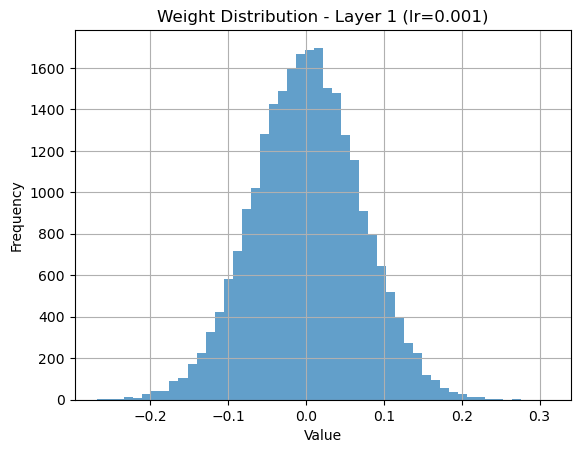

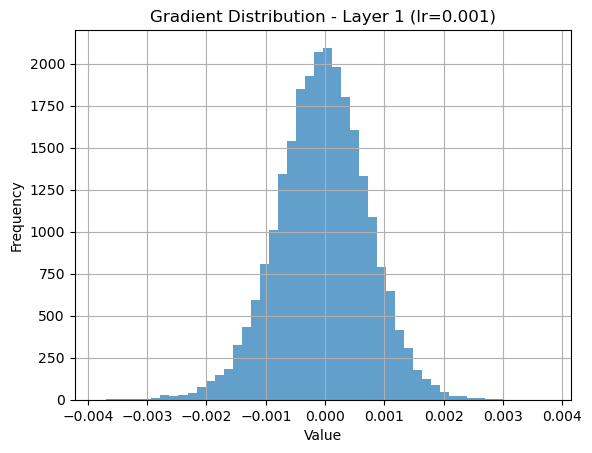

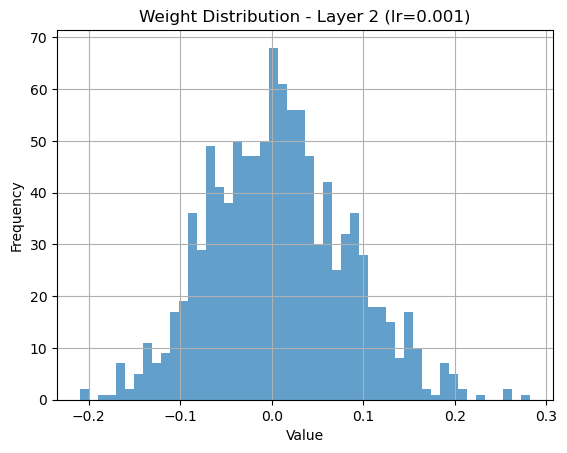

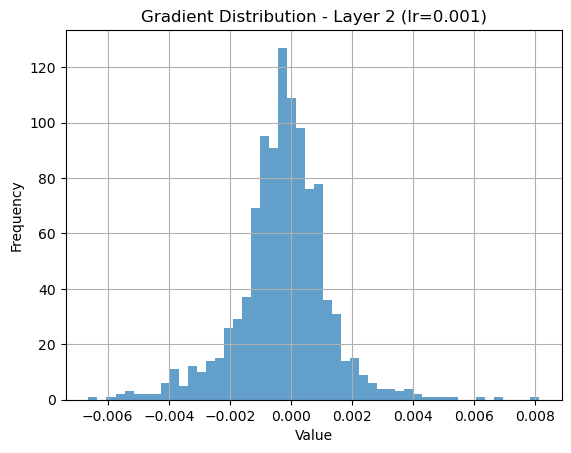

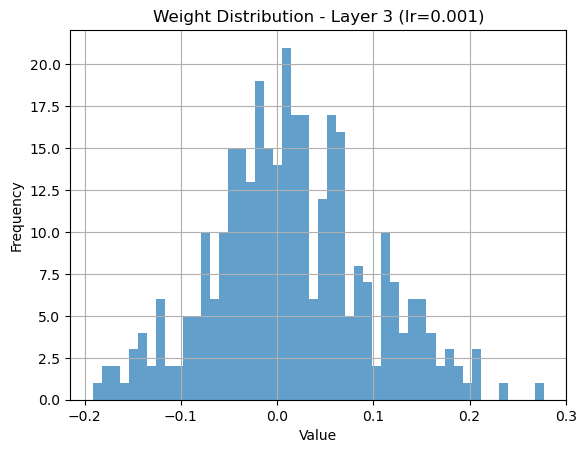

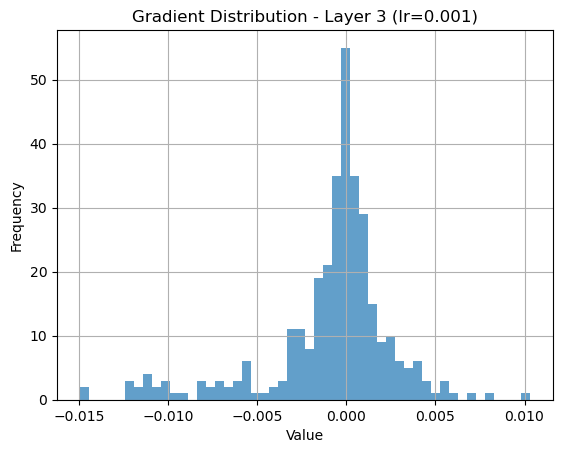

In [9]:
results = experiment_learning_rates(X_train, y_train, X_test, y_test,
                                    learning_rates=[0.1, 0.01, 0.001])

# Variasi Inisialisasi Bobot

In [10]:
def plot_distribution(arr, title):
    plt.hist(arr.flatten(), bins=50, alpha=0.7)
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

def experiment_weight_initializations(X_train, y_train, X_test, y_test,
                                      init_methods=['random_uniform', 'random_normal', 'xavier', 'he']):
    results = []

    for method in init_methods:
        print(f"\n Weight Initialization: {method}")
        activations = ['relu', 'relu', 'softmax']
        init_params = {'lower': -1.0, 'upper': 1.0} if 'random' in method else {}

        model = FFNN([784, 32, 10], activations,
                     weight_init=method,
                     init_params=init_params,
                     seed=42)

        history = model.train(X_train, y_train,
                              batch_size=32,
                              epochs=20,
                              learning_rate=0.01,
                              loss_func="categorical_cross_entropy",
                              X_val=X_test,
                              y_val=y_test,
                              verbose=0,
                              regularization="l2",
                              lambda_reg=0.01)

        y_pred = model.forward_propagation(X_test)
        y_true_cls = np.argmax(y_test, axis=1)
        y_pred_cls = np.argmax(y_pred, axis=1)
        acc = accuracy_score(y_true_cls, y_pred_cls)

        print(f"Accuracy: {acc:.4f}")

        results.append((method, history, acc, model.weights, model.gradients))

        # Plot loss
        plt.plot(history['train_loss'], label=f"Train ({method})")
        plt.plot(history['val_loss'], linestyle='--', label=f"Val ({method})")

    plt.title("Training & Validation Loss per Initialization Method")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Distribusi bobot & gradien
    for method, _, _, weights, grads in results:
        for i, (w, g) in enumerate(zip(weights, grads)):
            plot_distribution(w, f"Weight Distribution - Layer {i+1} ({method})")
            plot_distribution(g, f"Gradient Distribution - Layer {i+1} ({method})")

    return results



 Weight Initialization: random_uniform


Epoch 20/20: 100%|██████████| 60000/60000 [00:00<00:00, 89141.19inst/s]


Accuracy: 0.6207

 Weight Initialization: random_normal


Epoch 20/20: 100%|██████████| 60000/60000 [00:00<00:00, 91755.42inst/s]


Accuracy: 0.8797

 Weight Initialization: zero


Epoch 20/20: 100%|██████████| 60000/60000 [00:00<00:00, 88022.52inst/s]


Accuracy: 0.0980


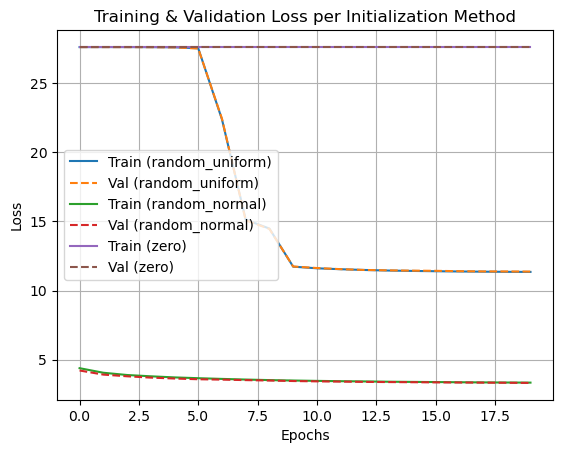

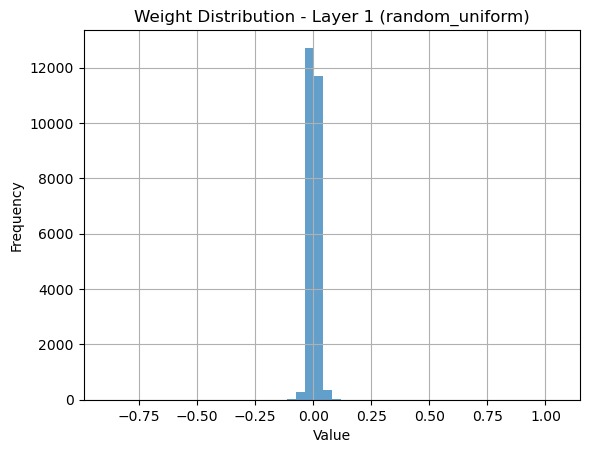

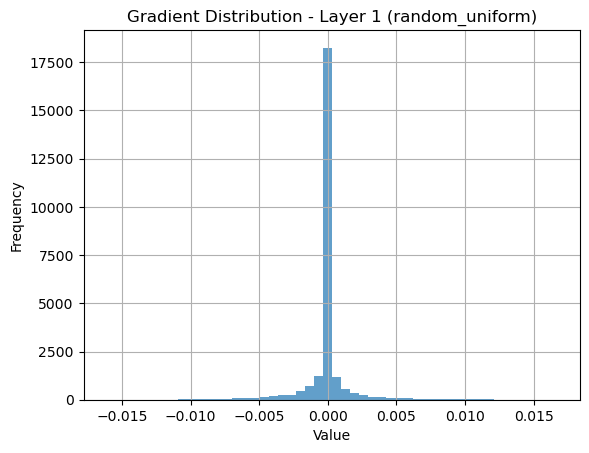

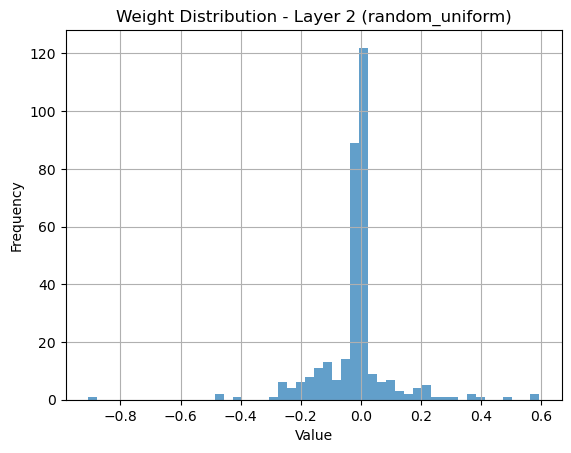

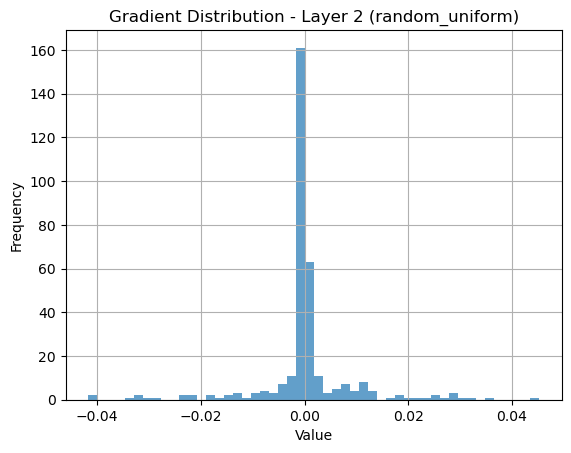

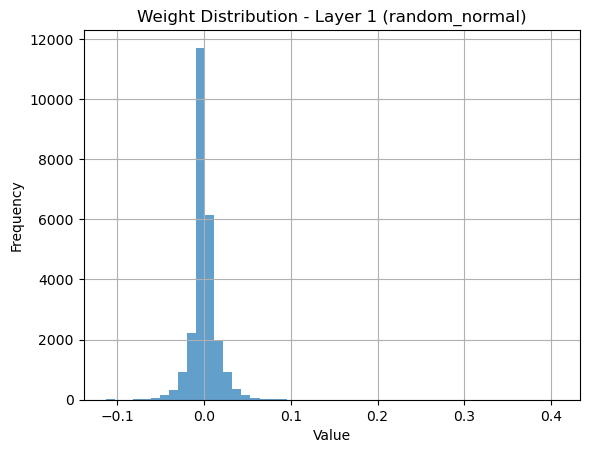

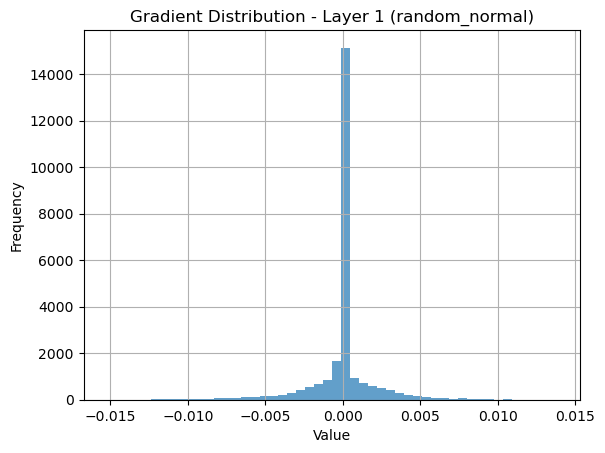

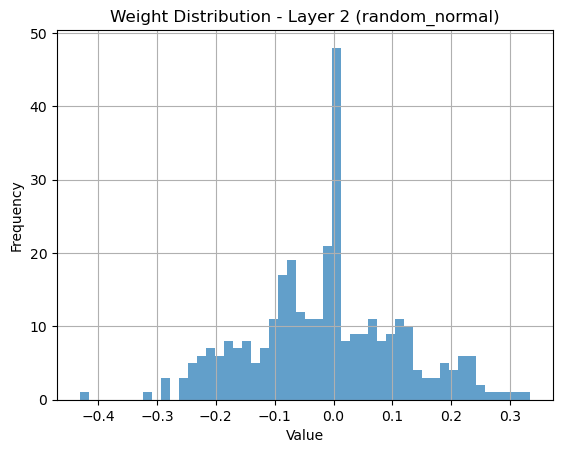

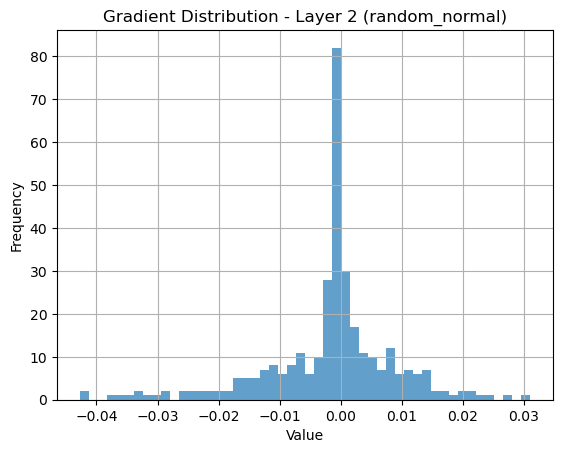

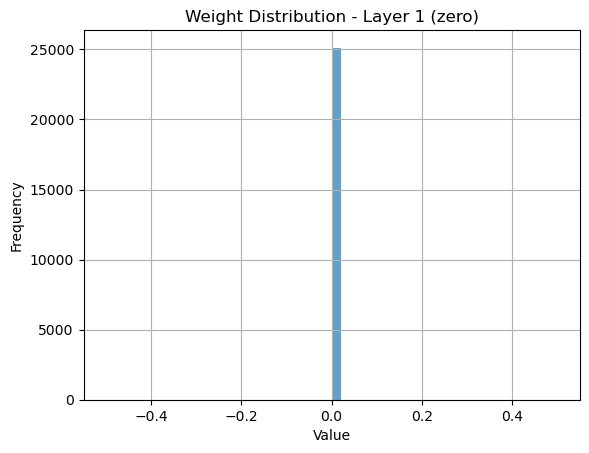

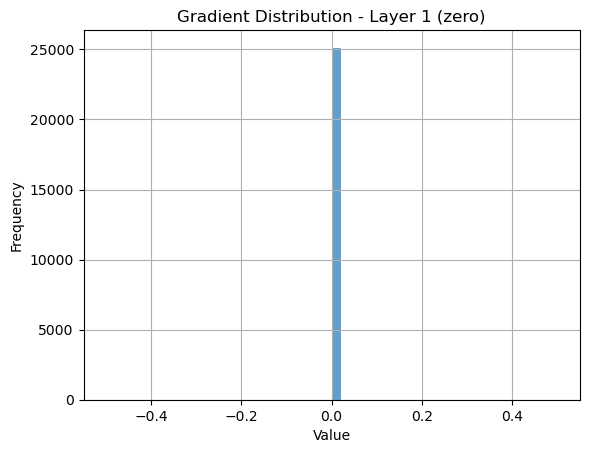

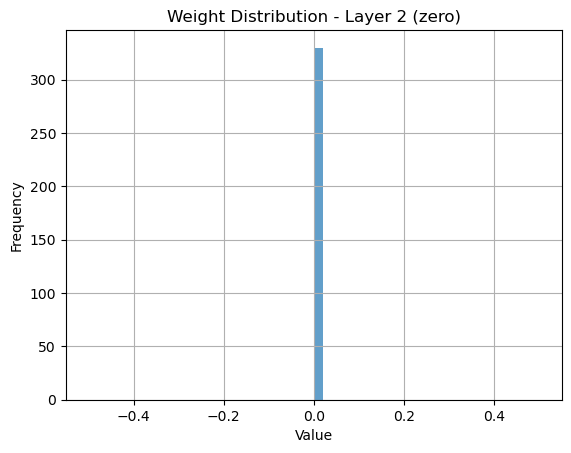

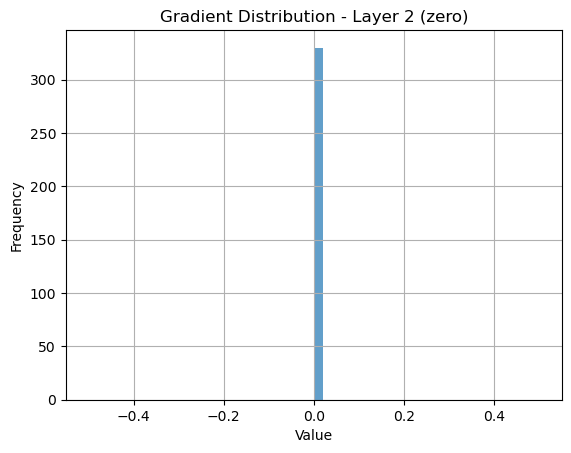

In [11]:
results = experiment_weight_initializations(
    X_train, y_train, X_test, y_test,
    init_methods=['random_uniform', 'random_normal', 'zero']
)

# Variasi Regularisasi

In [12]:
def plot_distribution(arr, title):
    plt.hist(arr.flatten(), bins=50, alpha=0.7)
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


def experiment_regularization(X_train, y_train, X_test, y_test):
    reg_types = [None, 'l1', 'l2']
    results = []
    
    for reg in reg_types:
        print(f"\n Regularization: {reg or 'None'}")

        model = FFNN(
            layer_sizes=[784, 32, 32, 10],
            activations=['relu', 'relu', 'softmax'],
            weight_init='random_normal',
            init_params={},
            seed=42
        )

        history = model.train(
            X_train, y_train,
            batch_size=32,
            epochs=20,
            learning_rate=0.01,
            loss_func="categorical_cross_entropy",
            X_val=X_test,
            y_val=y_test,
            verbose=0,
            regularization=reg,
            lambda_reg=0.01 if reg else 0.0
        )

        y_pred = model.forward_propagation(X_test)
        y_true_cls = np.argmax(y_test, axis=1)
        y_pred_cls = np.argmax(y_pred, axis=1)
        acc = accuracy_score(y_true_cls, y_pred_cls)

        print(f" Accuracy: {acc:.4f}")

        results.append((reg or 'none', history, acc, model.weights, model.gradients))

        # Plot loss per regularization
        plt.plot(history['train_loss'], label=f"Train ({reg or 'None'})")
        plt.plot(history['val_loss'], linestyle='--', label=f"Val ({reg or 'None'})")

    plt.title("Training & Validation Loss per Regularization Method")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Distribusi bobot & gradien
    for reg_type, _, _, weights, grads in results:
        for i, (w, g) in enumerate(zip(weights, grads)):
            plot_distribution(w, f"Weight Distribution - Layer {i+1} ({reg_type})")
            plot_distribution(g, f"Gradient Distribution - Layer {i+1} ({reg_type})")

    return results


 Regularization: None


Epoch 20/20: 100%|██████████| 60000/60000 [00:00<00:00, 70552.37inst/s]


 Accuracy: 0.0982

 Regularization: l1


Epoch 20/20: 100%|██████████| 60000/60000 [00:01<00:00, 51986.85inst/s]


 Accuracy: 0.1135

 Regularization: l2


Epoch 20/20: 100%|██████████| 60000/60000 [00:00<00:00, 67168.99inst/s]


 Accuracy: 0.8417


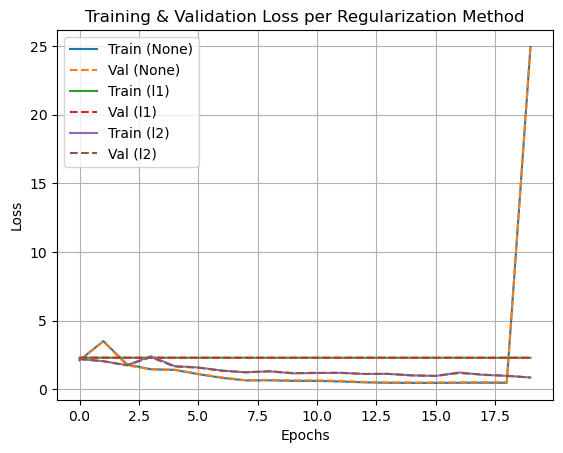

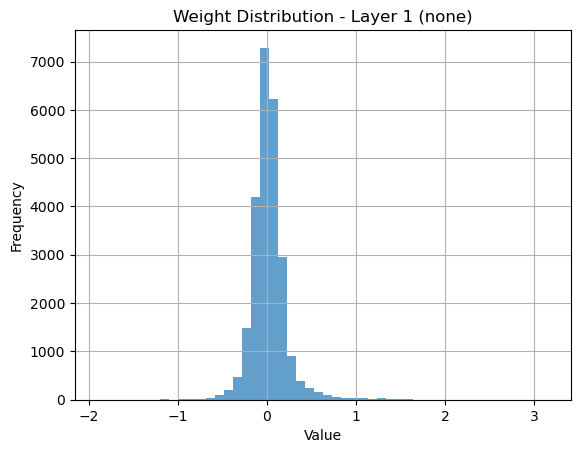

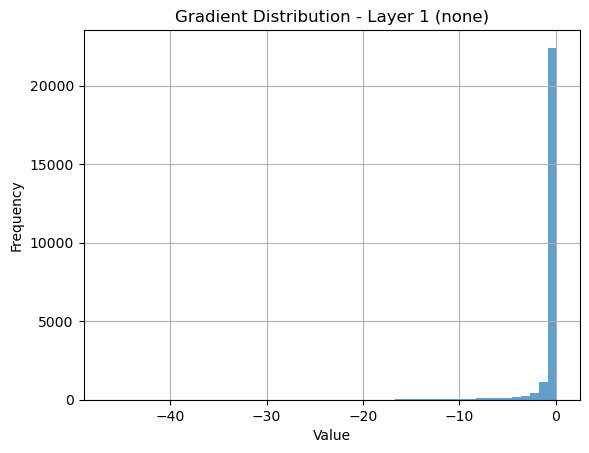

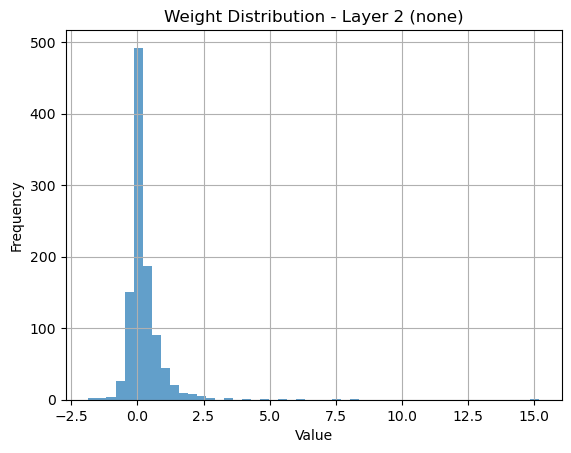

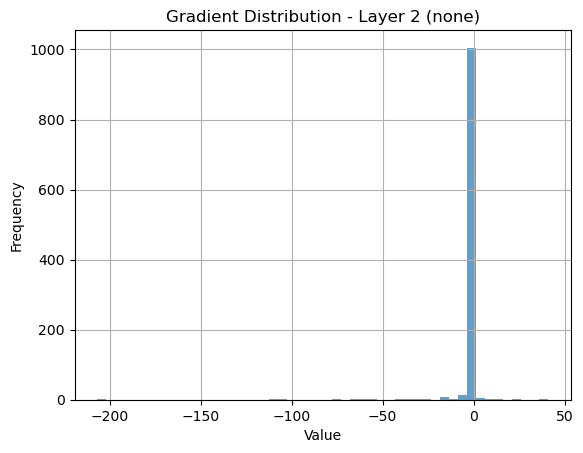

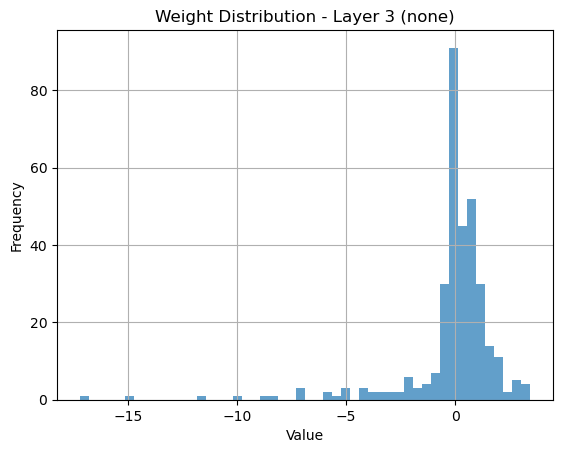

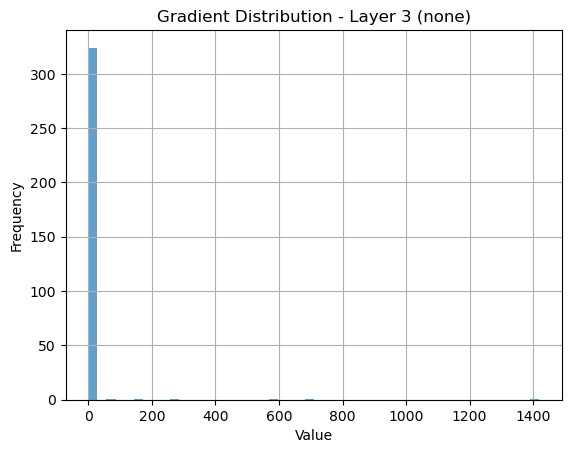

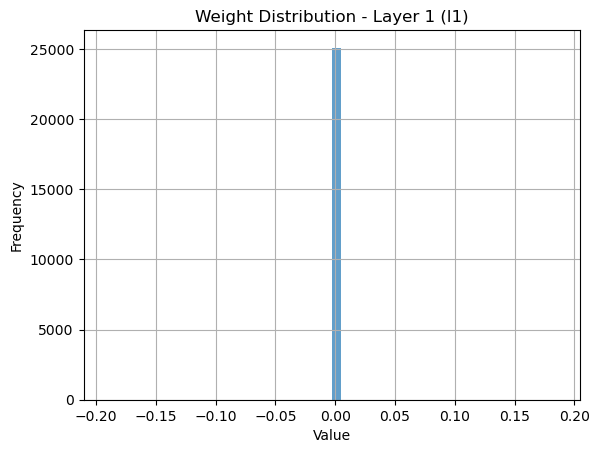

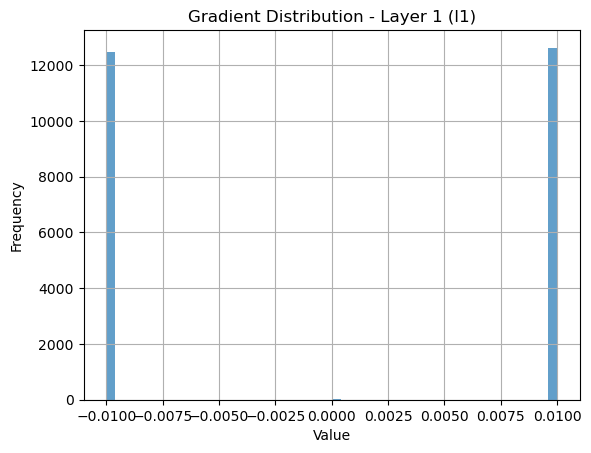

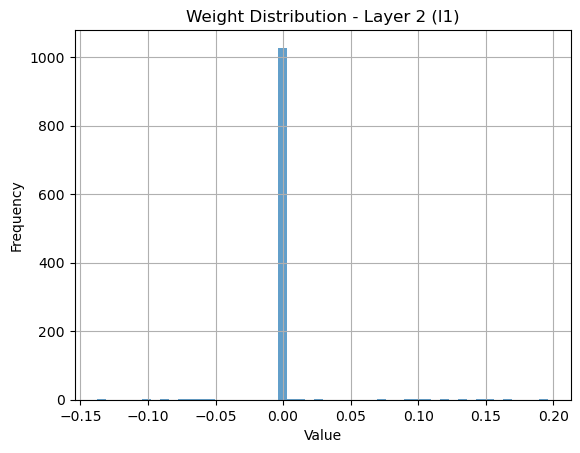

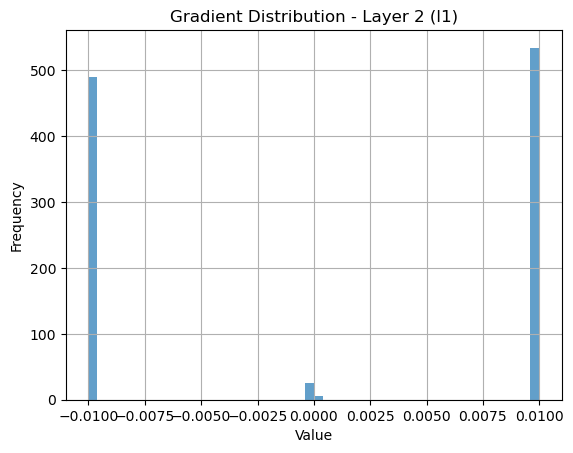

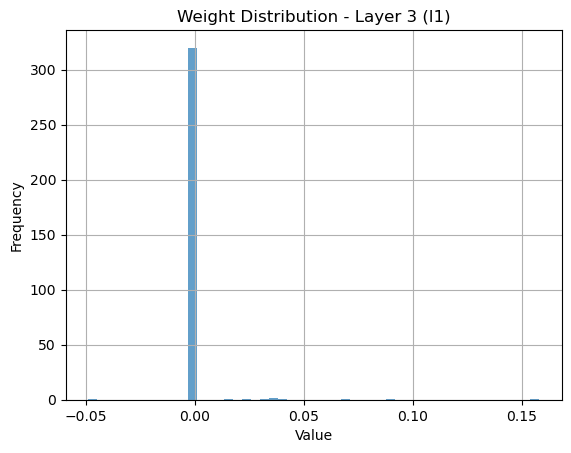

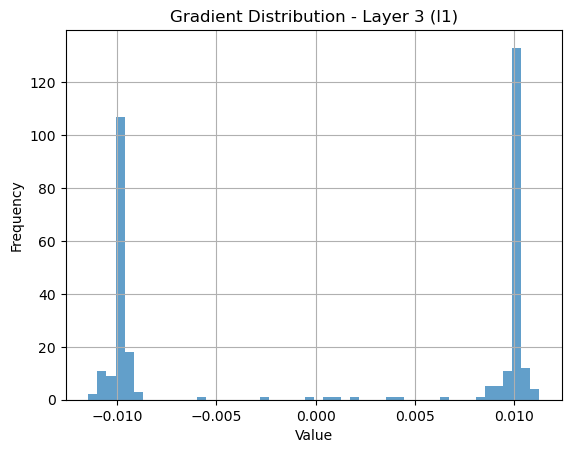

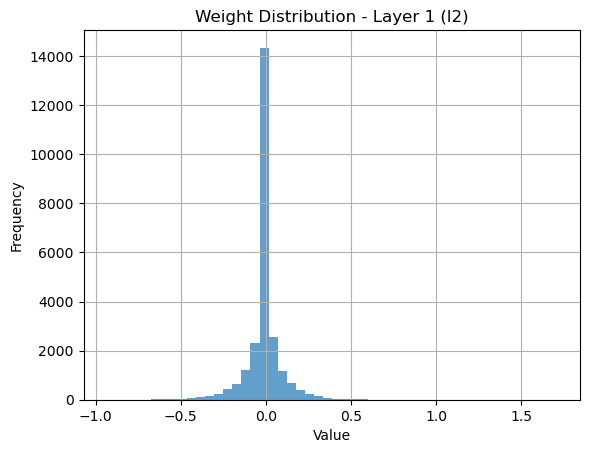

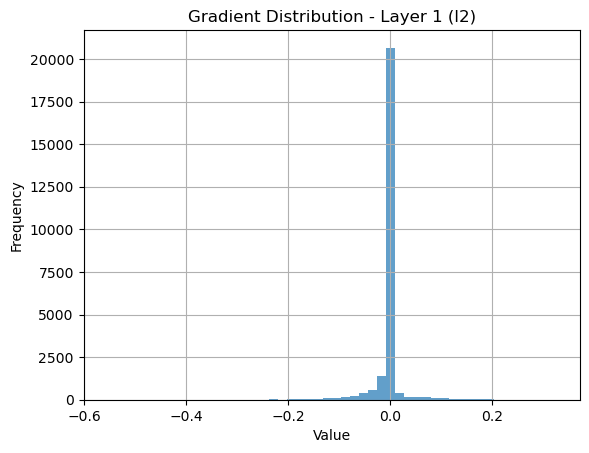

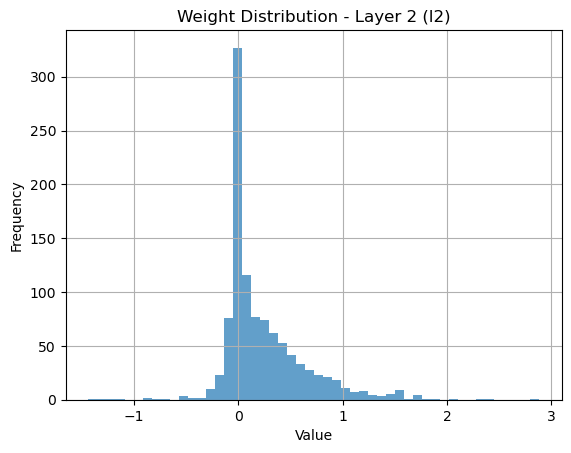

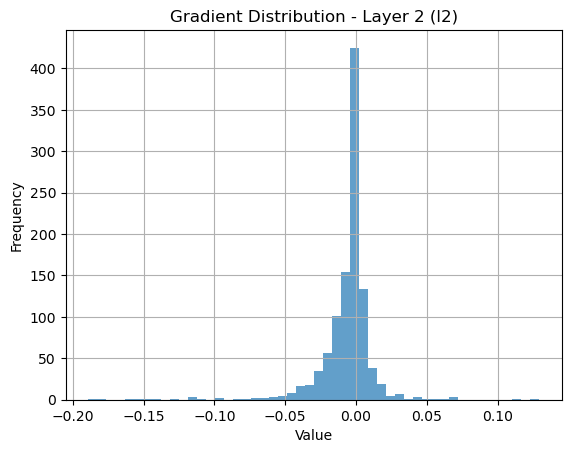

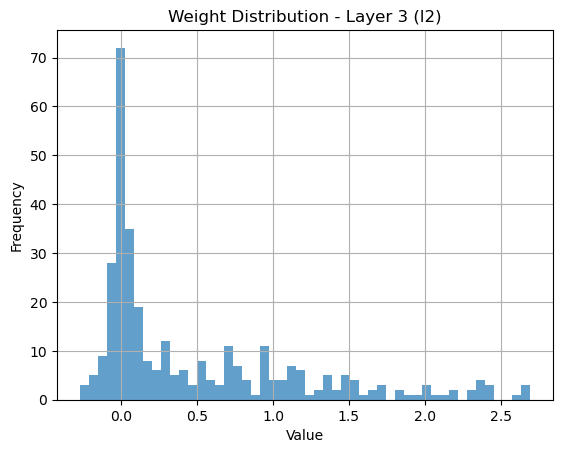

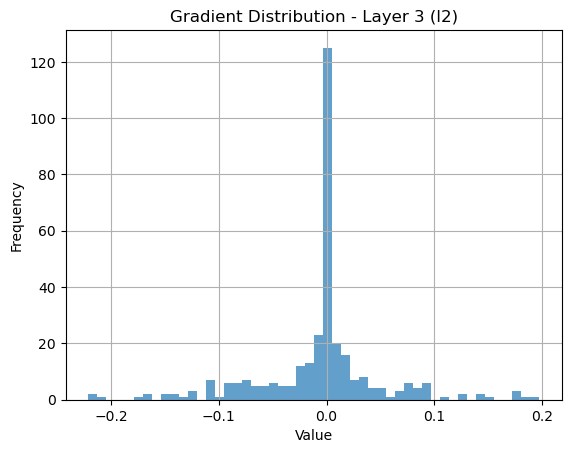

In [13]:
results = experiment_regularization(X_train, y_train, X_test, y_test)

# Perbandingan dengan Model MLPClassifier

In [14]:
def compare_with_sklearn(X_train, y_train, X_test, y_test):
    # Hyperparameter (bebas disesuaikan)
    layer_sizes = [784, 64, 64, 10]
    activations = ['relu', 'relu', 'softmax']
    learning_rate = 0.01
    epochs = 20
    batch_size = 32

    print("🔧 Melatih model FFNN kustom...")
    model_custom = FFNN(layer_sizes, activations, weight_init='random_normal', init_params={}, seed=42)
    model_custom.train(X_train, y_train,
                       batch_size=batch_size,
                       epochs=epochs,
                       learning_rate=learning_rate,
                       loss_func="categorical_cross_entropy",
                       X_val=X_test,
                       y_val=y_test,
                       regularization=None,
                       verbose=0)

    y_pred_custom = model_custom.forward_propagation(X_test)
    y_true_cls = np.argmax(y_test, axis=1)
    y_pred_cls_custom = np.argmax(y_pred_custom, axis=1)
    acc_custom = accuracy_score(y_true_cls, y_pred_cls_custom)
    print(f" Akurasi FFNN kustom: {acc_custom:.4f}")

    print("\n Melatih MLPClassifier (sklearn)...")
    mlp = MLPClassifier(hidden_layer_sizes=(64, 64),
                        activation='relu',
                        learning_rate_init=learning_rate,
                        max_iter=epochs,
                        batch_size=batch_size,
                        random_state=42,
                        solver='sgd')  
    mlp.fit(X_train, np.argmax(y_train, axis=1))
    y_pred_sklearn = mlp.predict(X_test)
    acc_sklearn = accuracy_score(np.argmax(y_test, axis=1), y_pred_sklearn)
    print(f" Akurasi MLPClassifier sklearn: {acc_sklearn:.4f}")

    return acc_custom, acc_sklearn
acc_custom, acc_sklearn = compare_with_sklearn(X_train, y_train, X_test, y_test)

🔧 Melatih model FFNN kustom...


Epoch 20/20: 100%|██████████| 60000/60000 [00:01<00:00, 55741.88inst/s]


 Akurasi FFNN kustom: 0.9225

 Melatih MLPClassifier (sklearn)...
 Akurasi MLPClassifier sklearn: 0.9803


c:\Users\konst\.conda\envs\waruds\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
